# Data Understanding und Data Preparation - 4: Feature Engineering und Zeitreihen

## Anforderungen an Projektumsetzung: Feature Engineering


Falls die Anforderungen auf den eigenen Projektdatensatz nicht anwendbar sind, gibt es folgende Möglichkeiten:
- Datensatz um passende Daten erweitern entweder manuell, per Anspielen aus weiterer Datenquelle oder zur Not per zufälliger Datengenerierung/-simulation
- Datensatz außerhalb des Projekts wählen und Anforderungen daran umsetzen

Anforderungen:
- Erstellen Sie mindestens 2 neue Features
- Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen
- Erstellen/Konvertieren Sie eine Time Series
- Erstellen Sie eine Analyse basierend auf den Zeitdaten

#### Laden der Bibliotheken & des Datensatzes

In [2]:
# Import der benötigten Bibliotheken

import importlib
import init_notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

In [3]:
importlib.reload(init_notebook)

dataset = init_notebook.get_initial_dataset()

# Umbenennen der Spalten:

dataset = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdruck', 'BLDS': 'Nüchterner Blutzucker', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hämoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker'})

dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,LDL_Cholesterin,Triglycerid,Hämoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


#### Erstellen Sie mindestens 2 neue Features

In [4]:
# Hinzufügen Feature 1 (Body-Mass-Index):

body_mass_index = dataset["Gewicht"].astype(np.float64) / ((dataset["Größe"].astype(np.float64) / 100) * (dataset["Größe"].astype(np.float64) / 100))

dataset["Body-Mass-Index"] = round(body_mass_index, 3)

dataset["Body-Mass-Index"].describe()

count    991346.000000
mean         23.917076
std           3.515088
min          12.487000
25%          21.484000
50%          23.875000
75%          25.952000
max          45.714000
Name: Body-Mass-Index, dtype: float64

Der Body-Mass-Index ergibt sich aus dem Gewicht in Kilogramm geteilt durch die Größe in Metern zum Quadrat.

In [5]:
# Hinzufügen Feature 2 (Mittlerer arterieller Blutdruck):

MAD = dataset["Diastolischer Blutdruck"] + (( dataset["Systolischer Blutdruck"] - dataset["Diastolischer Blutdruck"] ) * 0.5)

dataset["Mittlerer arterieller Blutdruck"] = MAD

dataset["Mittlerer arterieller Blutdruck"].describe()

count    991346.000000
mean         99.242563
std          11.428969
min          49.500000
25%          91.000000
50%          99.000000
75%         106.000000
max         212.500000
Name: Mittlerer arterieller Blutdruck, dtype: float64

Der mittlere arterielle Blutdruck ergibt sich aus dem diastolischen Blutdruck und dem Mittelwert des diastolischen und systolischen Blutdrucks.

In [6]:
# Hinzufügen Feature 3 (Geburtsjahr):

Geburtsjahr = 2023 - dataset['Alter']

dataset["Geburtsjahr"] = Geburtsjahr.astype(np.int16)

dataset["Geburtsjahr"].describe()

count    991346.000000
mean       1975.385509
std          14.181339
min        1938.000000
25%        1963.000000
50%        1978.000000
75%        1988.000000
max        2003.000000
Name: Geburtsjahr, dtype: float64

Mit Hilfe des Alters lässt sich das Geburtsjahr der Probanden berechnen. Da das Dataset im Jahre 2023 veröffentlicht wurde, wird davon ausgegangen, dass die Daten auch dort erhoben wurden.

#### Untersuchen Sie die Korrelationen gesamthaft und graphisch für mindestens 2 Feature-Kombinationen

Zum Untersuchen der Features auf Korrelation werden diese zunächst bereinigt.

In [7]:
# Features bereinigen:

    # Trinker 'Y' --> 1 & 'N' --> 0:

dataset['Trinker'] = dataset['Trinker'] == 'Y'
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Neue Spalten 'Mann' & 'Frau': 1 wenn true, 0 wenn false:

dataset['Mann'] = dataset['Geschlecht'] == 'Male'
dataset['Frau'] = dataset['Geschlecht'] == 'Female'

    # Format als Integer:

dataset['Mann'] = dataset['Mann'].astype(int)
dataset['Frau'] = dataset['Frau'].astype(int)
dataset['Trinker'] = dataset['Trinker'].astype(int)

    # Entfernen der ursprünglichen 'Geschlecht'-Spalte:

dataset = dataset.drop('Geschlecht', axis=1)

dataset.head()

,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,Diastolischer Blutdruck,...,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck,Geburtsjahr,Mann,Frau
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,21.0,35.0,40.0,1.0,1,25.952,100.0,1988,1,0
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,20.0,36.0,27.0,3.0,0,24.691,106.0,1993,1,0
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,47.0,32.0,68.0,1.0,0,27.548,95.0,1983,1,0
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,29.0,34.0,18.0,1.0,0,26.122,116.0,1973,1,0
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,19.0,12.0,25.0,1.0,0,22.039,110.0,1973,1,0


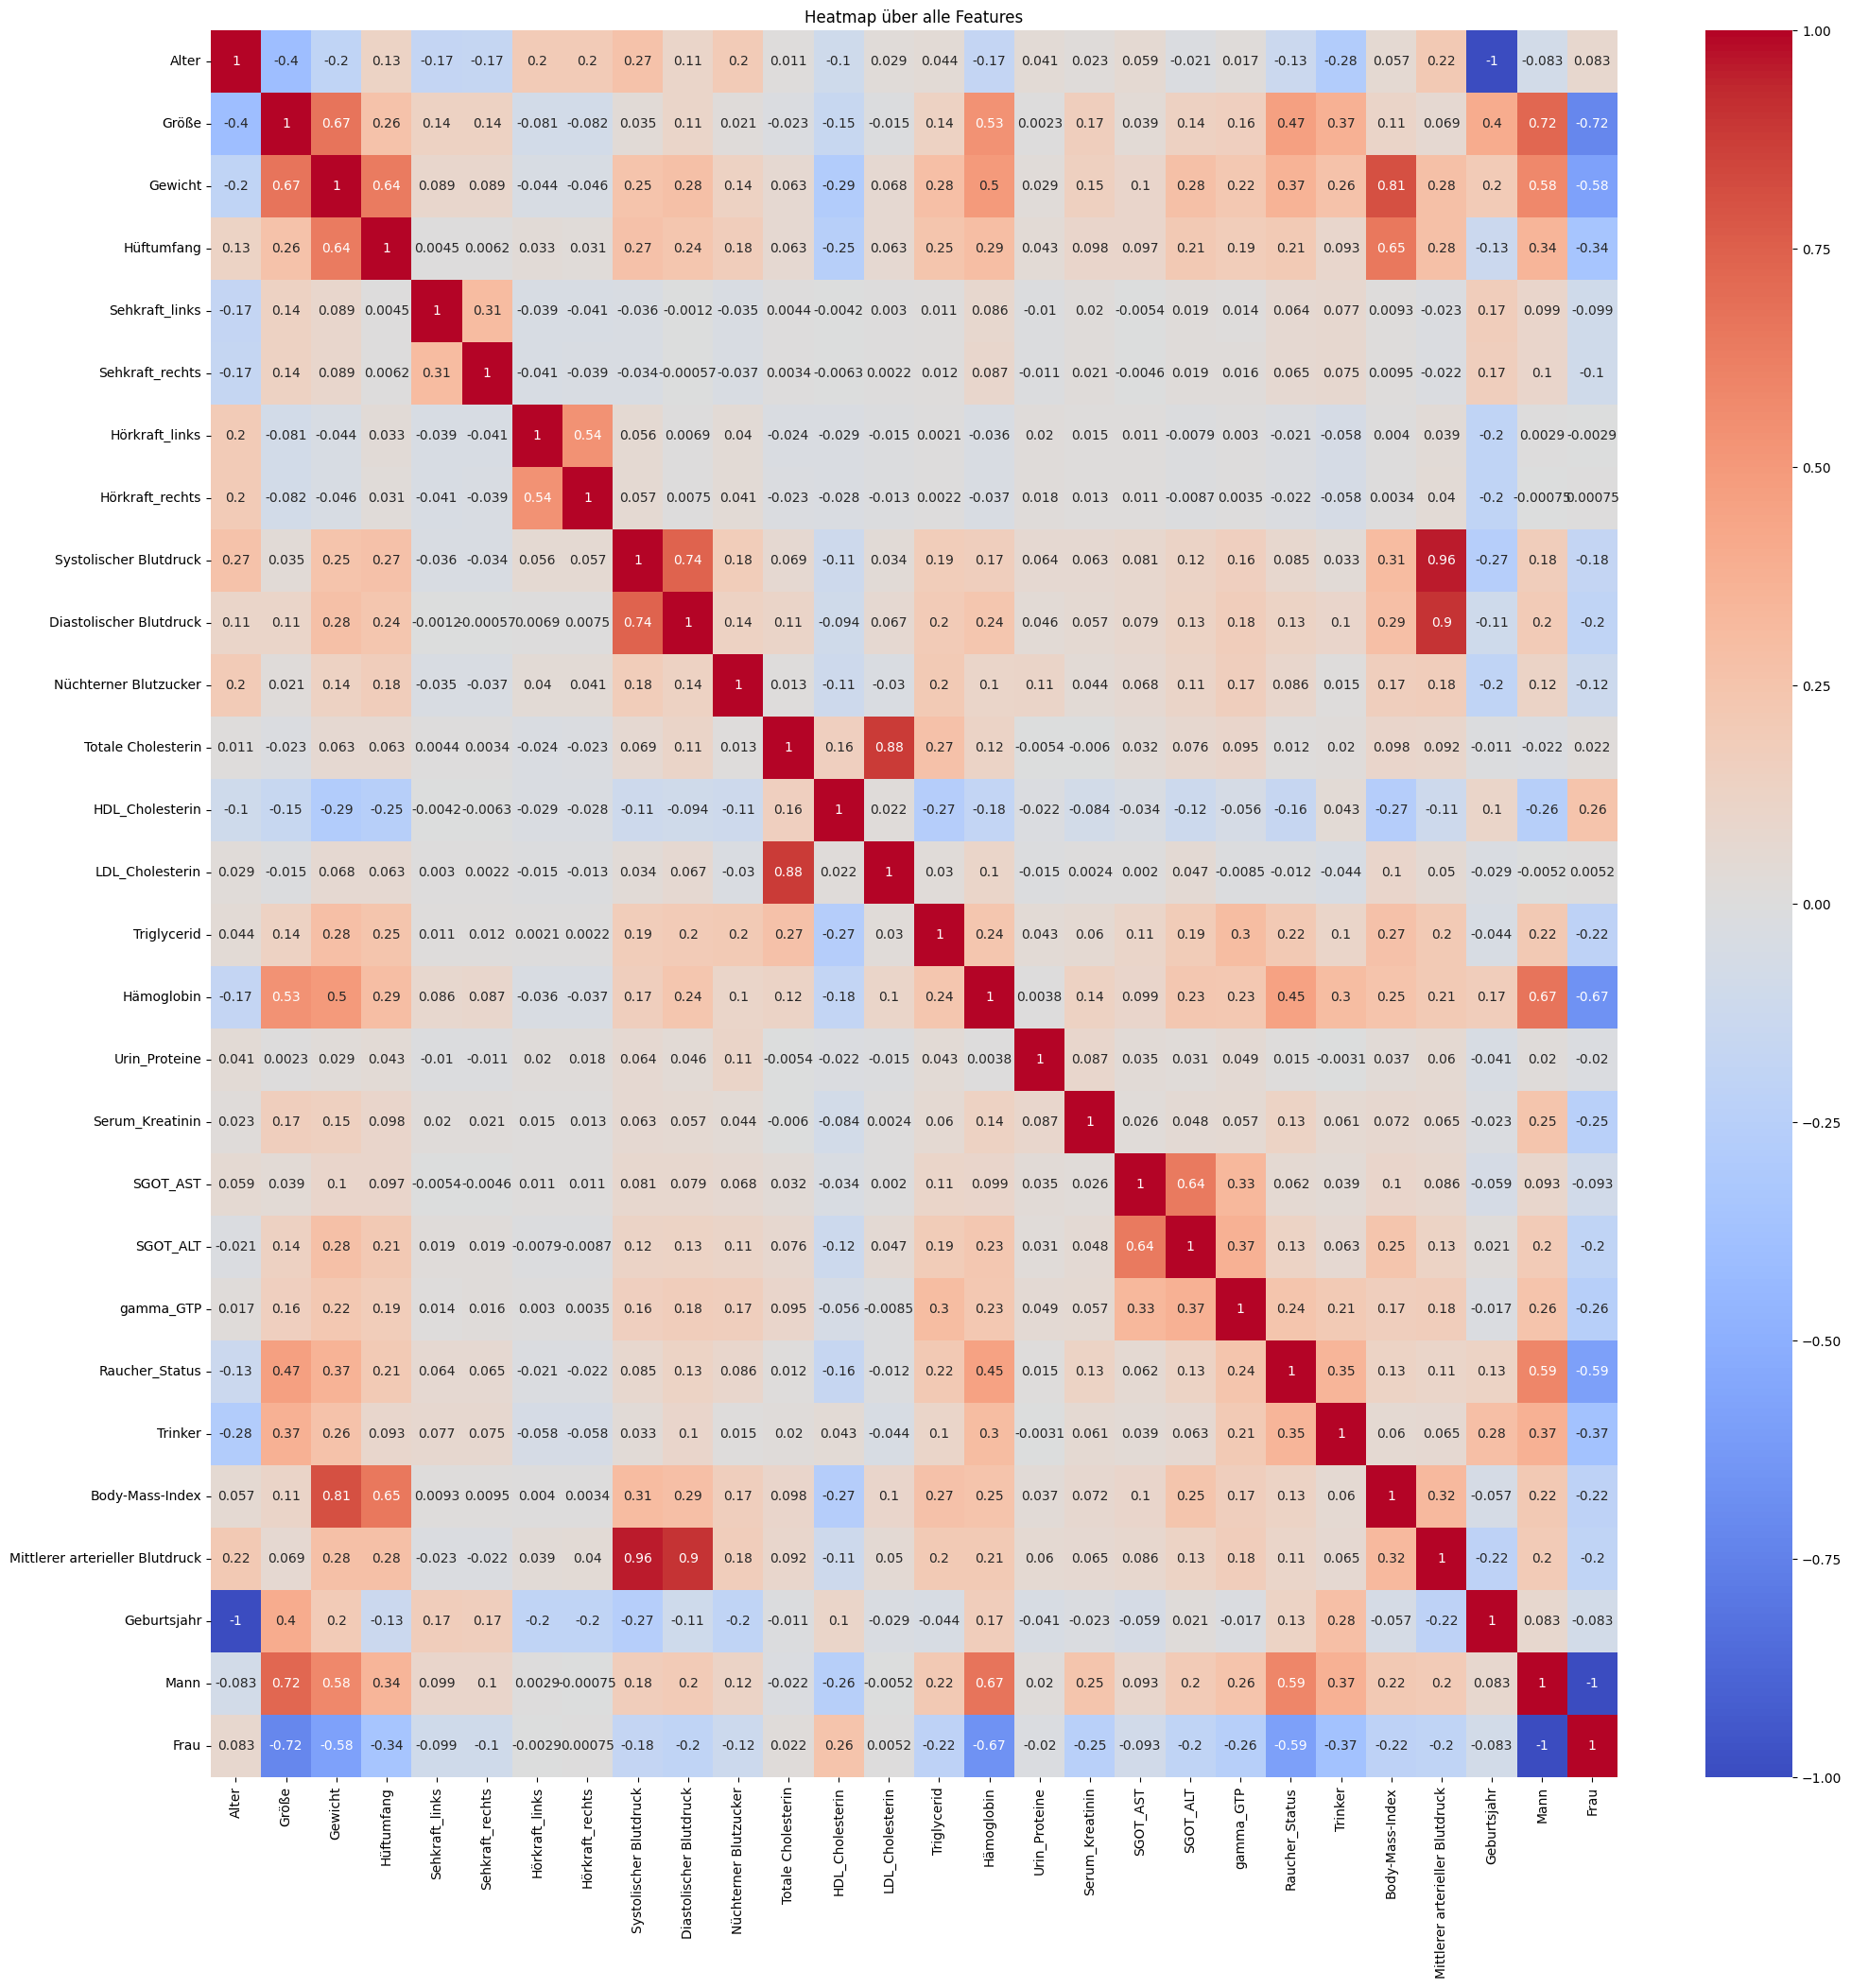

In [8]:
# Untersuchung der Korrelation aller Features in einer Heatmap:

plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title('Heatmap über alle Features')
plt.show()

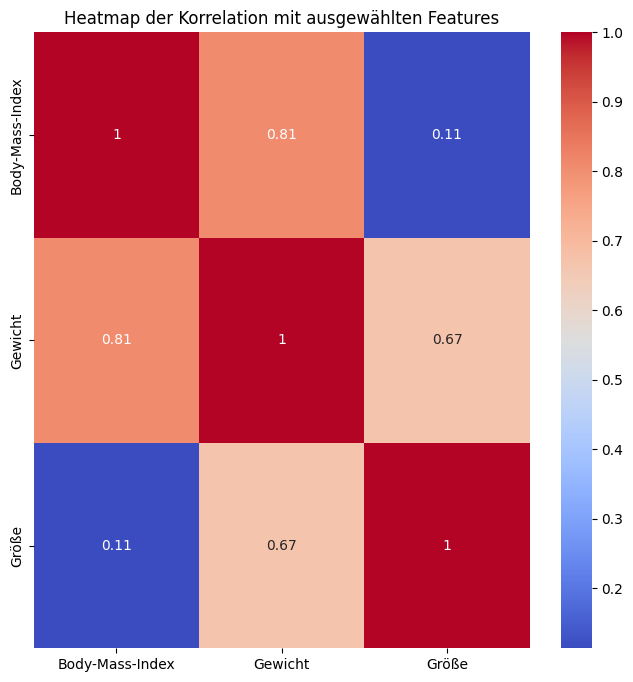

In [9]:
# Untersuchung der Korrelation mit weniger Features:

    # BMI, Gewicht, Größe:

plt.figure(figsize=(8, 8))
dataset1 = dataset[['Body-Mass-Index', 'Gewicht', 'Größe']]
heatmap = sns.heatmap(dataset1.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap der Korrelation mit ausgewählten Features')
plt.show()

Erkenntnisse: 

Zu Beginn erfolgte eine Analyse der Korrelation aller Features mithilfe einer Heatmap. 

Dabei zeigte sich, dass eine fokussierte Untersuchung unter Verwendung einer reduzierten und gezielt ausgewählten Auswahl von Features sinnvoller ist. Für eine detailliertere Analyse wurden die Merkmale "Größe", "Gewicht" und "BMI" ausgewählt. 

Besonders auffällig ist die deutliche Korrelation zwischen Gewicht und BMI. 

Bemerkenswert ist jedoch die niedrige Korrelation zwischen Größe und BMI in dieser Darstellung. Generell neigen Personen mit größerer Körpergröße dazu, höhere 
BMI-Werte aufzuweisen, da der BMI das Verhältnis von Gewicht zu Größe berücksichtigt.

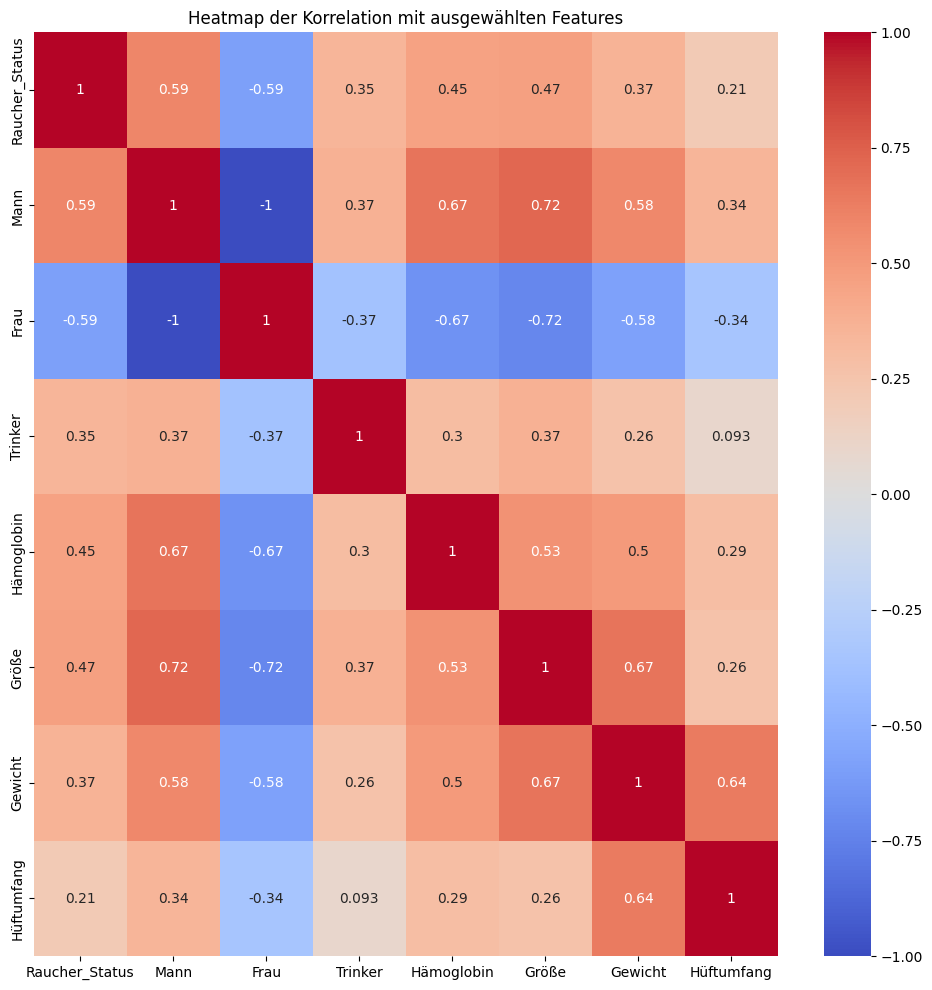

In [10]:
# Untersuchung der Korrelation mit weniger Features:

    # Raucher_Status, Mann, Frau, Trinker, Hämoglobin, Größe, Gewicht, Hüftumfang:

plt.figure(figsize=(12, 12))
dataset1 = dataset[['Raucher_Status', 'Mann', 'Frau', 'Trinker', 'Hämoglobin', 'Größe', 'Gewicht', 'Hüftumfang']]
heatmap = sns.heatmap(dataset1.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap der Korrelation mit ausgewählten Features')
plt.show()

Erkenntnisse: 

Zudem wird die Korrelation des Raucher Status untersucht, mit dem vor allem folgende Features korrelieren:

    Mann, Frau, Trinker, Hämoglobin, Größe, Gewicht, Hüftumfang

Besonders interessant ist hierbei, dass die Größe eines Probanden mit dem Raucherverhalten korreliert.

Auch die Körpermaße (Gewicht und Hüftumfang) scheinen positiv mit dem Raucher Status zu korrelieren.

Dass sich das Raucherverhalten auf den Hämoglobinspiegel auswirkt, ist nicht nur aus den Daten schlüssig, sondern geht ebenso aus Studien hervor ([Quelle](https://jamanetwork.com/journals/jama/article-abstract/383339#:~:text=Mean%20hemoglobin%20levels%20and%20carboxyhemoglobin%20levels%20increased%20progressively,the%20utility%20of%20hemoglobin%20level%20to%20detect%20anemia.)).

Dennoch ist es erstaunlich, dass auch das Geschlecht der Probanden mit dem Raucherstatus zusammenhängt. Männer scheinen tendenziell eher zu rauchen.

In [11]:
dataset = dataset.drop(columns=['Sehkraft_links', 'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts', 'Urin_Proteine', 'Serum_Kreatinin'])

dataset.head()

,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,Mittlerer arterieller Blutdruck,Geburtsjahr,Mann,Frau
0,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,...,21.0,35.0,40.0,1.0,1,25.952,100.0,1988,1,0
1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,...,20.0,36.0,27.0,3.0,0,24.691,106.0,1993,1,0
2,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,...,47.0,32.0,68.0,1.0,0,27.548,95.0,1983,1,0
3,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,...,29.0,34.0,18.0,1.0,0,26.122,116.0,1973,1,0
4,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,...,19.0,12.0,25.0,1.0,0,22.039,110.0,1973,1,0


Da die Features Sehkraft_links, Sehkraft_rechts, Hörkraft_links, Hörkraft_rechts, Urin_Proteine und Serum_Kreatinin keine Korrelation zu anderen Features aufweisen, werden sie für die folgenden Anforderungen aus dem Datensatz gelöscht.

#### Erstellen/Konvertieren Sie eine Time Series

Da wir keine konkrete Zeitreihe in unserem Datensatz aufweisen können, wandeln wir das Alter zu einem Geburtsdatum um und verfahren mit diesem als Zeitreihe weiter.

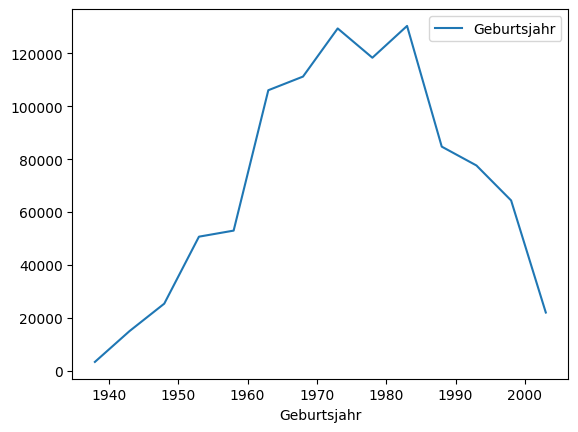

In [59]:
# Zeitreihe basierend auf dem Geburtsjahr erstellen:

dataset['Geburtsjahr'] = 2023 - dataset['Alter']

years = dataset.groupby('Geburtsjahr').agg({'Geburtsjahr':'count'})

years.plot()
plt.show()

Hierzu wird das Geburtsjahr auf einzelne Monate aufgeteilt (upsampling).

In [60]:
# Upsampling des Datasets auf Monatsebene, da wir das Geburtsjahr lediglich in 5-Jahres-Intervallen vorliegen haben:

    # Datumsspalte erstellen:

dataset['Geburtstag'] = '1231'
dataset['Geburtsdatum'] = dataset['Geburtsjahr'].astype(str) + dataset['Geburtstag']

dataset['Geburtsdatum'] = pd.to_datetime(dataset['Geburtsdatum'], format = '%Y%m%d')

dataset['Anzahl'] = 1

    # Lineares Resampling auf Monatsebene:

years = dataset.groupby('Geburtsdatum').agg({'Anzahl': 'count'})

years_upsampled = years.resample('M').asfreq().interpolate(method='linear')

years_upsampled.head()

,Anzahl
Geburtsdatum,
1938-12-31,3291.000000
1939-01-31,3485.616667
1939-02-28,3680.233333
1939-03-31,3874.850000
1939-04-30,4069.466667


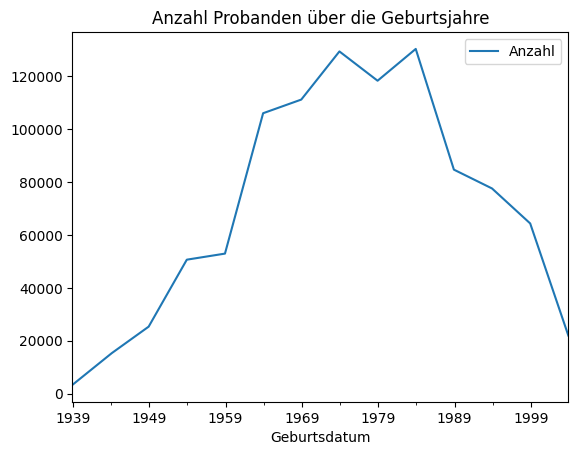

In [61]:
# Darstellen der Zeitreihe:

years_upsampled.plot()
plt.title('Anzahl Probanden über die Geburtsjahre')
plt.show()

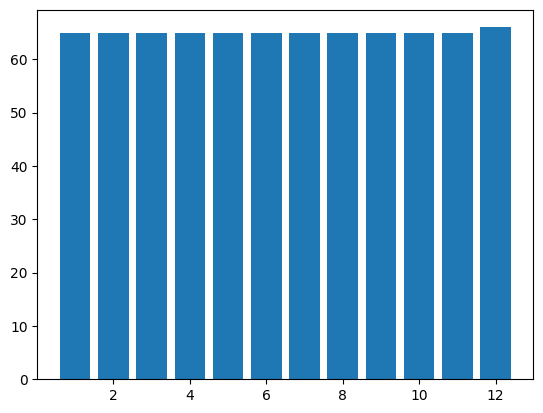

In [62]:
# Verteilung der Monate durch das Upsampling:

years_upsampled = years_upsampled.reset_index()

years_upsampled['Monat'] = years_upsampled['Geburtsdatum'].dt.month
per_month = years_upsampled.groupby('Monat').size()
plt.bar(x=per_month.index, height=per_month.values)
plt.show()

Die Verteilung über die Monate ist sehr ausgeglichen. Der ursprüngliche Monat (Dezember) kommt etwas häufiger vor.

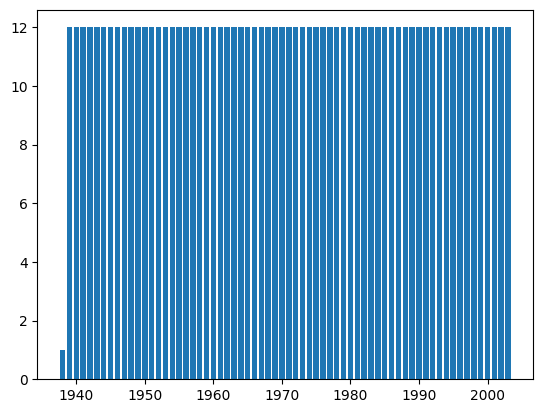

In [63]:
# Verteilung der Jahre durch das Upsampling:

years_upsampled['Jahr'] = years_upsampled['Geburtsdatum'].dt.year
per_year = years_upsampled.groupby('Jahr').size()
plt.bar(x=per_year.index, height=per_year.values)
plt.show()

Auch die Verteilung über die Jahre (bis auf das erste Jahr, 1938) ist ausgeglichen.

In [64]:
today = date.today()
born = years_upsampled['Geburtsdatum']
years_upsampled['Alter resampelt'] =  today.year - born.dt.year

years_upsampled['Alter resampelt'].describe()

count    781.000000
mean      52.042254
std       18.798786
min       20.000000
25%       36.000000
50%       52.000000
75%       68.000000
max       85.000000
Name: Alter resampelt, dtype: float64

#### Erstellen Sie eine Analyse basierend auf den Zeitdaten

In [66]:
years.head()

,Anzahl
Geburtsdatum,
1938-12-31,3291
1943-12-31,14968
1948-12-31,25333
1953-12-31,50666
1958-12-31,52961


Steigung : 82.14490452932871
y-Achsenabschnitt : 43169.032688107254


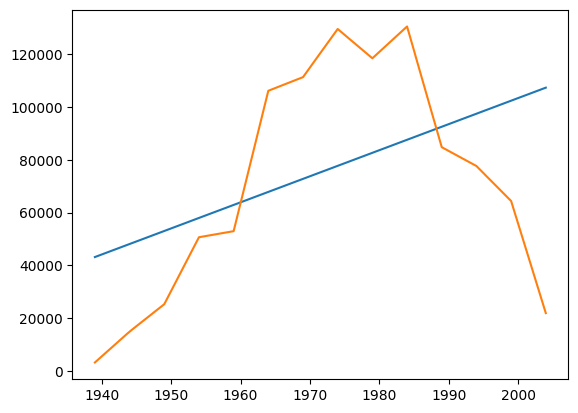

In [67]:
# Hinzufügen einer Trendlinie:

years = years_upsampled

x = np.arange(years['Geburtsdatum'].size)

fit = np.polyfit(x, years['Anzahl'], deg=1)
print ("Steigung : " + str(fit[0]))
print ("y-Achsenabschnitt : " + str(fit[1]))

fit_function = np.poly1d(fit)

plt.plot(years['Geburtsdatum'], fit_function(x))
plt.plot(years['Geburtsdatum'], years['Anzahl'])

plt.show()

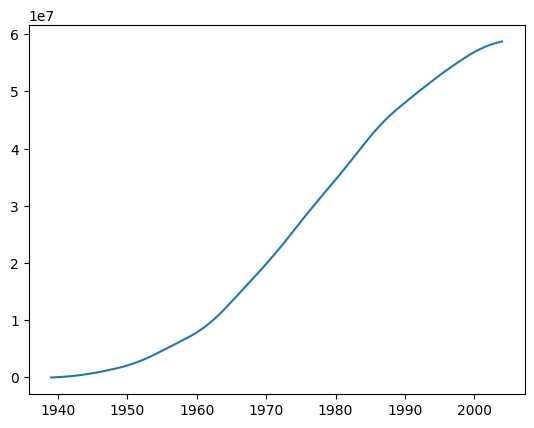

In [69]:
# Kumulierte Ansicht:

plt.plot(years['Geburtsdatum'], years['Anzahl'].cumsum())

Erkenntnissen aus der Zeitreihe:

Der vorliegende Datensatz erweist sich als weniger geeignet für Zeitreihenanalysen. 

Dennoch wurde die Analysemethode angewendet, wobei das Geburtsjahr als der einzige verfügbare zeitliche Wert auf der horizontalen Achse verwendet wurde. 
Die vertikale Achse repräsentiert die Anzahl der Geburtsjahre. 

Die grafische Darstellung offenbart einen zunächst ansteigenden Trend in der Anzahl der Probanden mit fortschreitendem Geburtsjahr. 
Ab dem Jahr 1983 zeigt sich jedoch ein Abflachen dieses Trends. 

Dies wird durch eine eingezeichnete Trendlinie zusätzlich verdeutlicht. Es ist wichtig zu betonen, dass die gewählte Analysemethode für diesen Datensatz nicht optimal geeignet ist. Diese Analyse diente vielmehr dem Zweck, die Methodik kennenzulernen und diese anzuwenden, als präzise Erkenntnisse zu generieren.